<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/MLPRegressor_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLPRegressor Comprehensive Comparision

Az MLPRegressor jobb megértése végett egy öszehasonlító vizsgálatot szeretnék elvégezni.

(A modszer elvégezhető PyTorchban, vagy Kerasban is)

Vegyünk egy MLPRegresszort(batch_size=32, max_iter=10)

Mérjük meg az eredményét időben is.

Vegyünk egy másik MLPRegressort(Warm_start=True, batch_size='all', max_iter=1)

Fontos, hogy ezen mlp.partial_fit() metodust hívjuk.

Azonban az egészet tegyük egy for i in range(10): ciklusba

Ahol minden egyes körben véletlenszerűen kiválasztunk 32 elemet, és ebből képezzük arra a körre a teljes mintát.

Az összehasonlítás, hogy teljesít ez a két módszer.

# Olvasmány

Van egy pár érdekes különbség az egyes keretrendszerek között - ami fejtörést okozott.

A megoldás a [scikit](https://stackoverflow.com/questions/68201786/different-loss-values-and-accuracies-of-mlp-regressor-in-keras-and-scikit-learn) egész sajátos square_error-t számol és ezt hívja loss-nak.

Egy másik [nagyon jó leírás](https://stackoverflow.com/questions/51649746/fetching-the-loss-values-mae-per-iteration-using-sklearn-mlpregressor) a warm_start és a partial_fit használatáról.

Random_stat témakörben is érdemes elolvasni az [alábbi](https://scikit-learn.org/stable/common_pitfalls.html) bejegyzést.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

Csináljuk meg az adatokat.

In [3]:
# x = np.arange(0, 1, 0.001)
x = np.linspace(0, 1, 1024)
y = np.sin(x/180*2262.0) * x

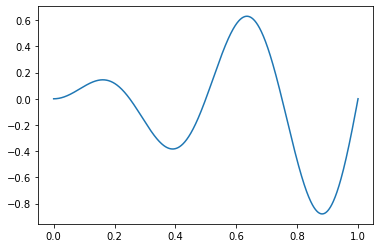

In [4]:
plt.plot(x,y); plt.show()

Hozzuk az adatokat scikit learn kompatibilis formába.

In [5]:
_x = x.reshape(x.size, 1)

print(x.shape)
print(_x.shape)

_y = y.reshape(y.size, 1)

print(y.shape)
print(_y.shape)

(1024,)
(1024, 1)
(1024,)
(1024, 1)


Csináljuk meg a default modelt.

In [6]:
architect = (20, )
activation = 'tanh'
solver = 'sgd'
batch_size = 32
learning_rate = 0.02
iter = 1000

shuffle = True
random_state = 3
verbose = 0

np_random_seed = 1


In [7]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

default = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,
                       learning_rate_init=learning_rate,
                       max_iter=iter,
                       shuffle=shuffle,
                       random_state=random_state,
                       verbose=verbose,
                       warm_start=False,
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=iter)

default.fit(_x,y)


MLPRegressor(activation='tanh', batch_size=32, hidden_layer_sizes=(20,),
             learning_rate_init=0.02, max_iter=1000, n_iter_no_change=1000,
             nesterovs_momentum=False, random_state=3, solver='sgd',
             validation_fraction=0.0, verbose=0)

MSE   =  0.012910065099349319
MAE   =  0.08203347646710517
MSE/2 =  0.006455032549674659
SE    =  0.006455032549674659
loss_ =  0.006997691457189027
score =  0.9185953352561811
loss_ =  squared_error
t_    =  1024000


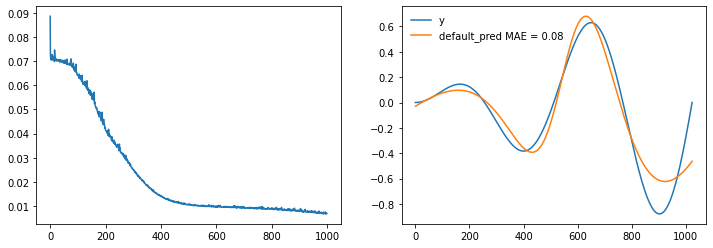

In [8]:
default_pred = default.predict(_x)
default_error = mean_squared_error(y, default_pred)
default_error_ = mean_absolute_error(y, default_pred)
default_score   = default.score(_x, y)
default_error__  = ((y - default_pred) ** 2).mean() / 2

print('MSE   = ', default_error)
print('MAE   = ', default_error_)
print('MSE/2 = ', default_error/2)
print('SE    = ', default_error__)
print('loss_ = ', default.loss_)
print('score = ', default_score)
print('loss_ = ', default.loss)
print('t_    = ', default.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(default.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(default_pred, label = 'default_pred ' + str('MAE = {:.2f}'.format(default_error_)))
ax2.legend(frameon = False)
plt.show()


In [21]:
def print_model(model):
  print('t             =', model.t_)
  print('n_features_in =', model.n_features_in_)
  print('n_iter        =', model.n_iter_)
  print('n_layers      =', model.n_layers_)
  print('n_outputs     =', model.n_outputs_)
  print('score         =', model.score(_x, y))

  print('batch_size    ='   , default.get_params()['batch_size'])
  print('learning_rate ='   , default.get_params()['learning_rate_init'])
  print('max_iter      ='   , default.get_params()['max_iter'])
  print('shuffle       ='   , default.get_params()['shuffle'])
  print('warm_start    ='   , default.get_params()['warm_start'])
  
print_model(default)


t             = 1024000
n_features_in = 1
n_iter        = 1000
n_layers      = 3
n_outputs     = 1
score         = 0.9185953352561811
batch_size    = 32
learning_rate = 0.02
max_iter      = 1000
shuffle       = True
warm_start    = False


In [141]:
from sklearn.model_selection import cross_validate, cross_val_predict

score = cross_validate(
        default, _x, y, scoring=["r2", "neg_mean_absolute_error"], n_jobs=2, verbose=1
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   40.6s finished


In [142]:
y_pred = cross_val_predict(default, _x, y, n_jobs=2, verbose=1)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   39.7s finished


In [149]:
def plot_regression_results(ax, y_true, y_pred, title, scores):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "--r", linewidth=2
    )
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc="w", fill=False, edgecolor="none", linewidth=0
    )
    ax.legend([extra], [scores], loc="upper left")

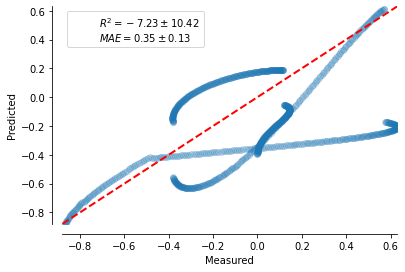

In [150]:
fig, ax = plt.subplots(1,1)

plot_regression_results(
        ax,
        y,
        y_pred,
        'aa',
        (r"$R^2={:.2f} \pm {:.2f}$" + "\n" + r"$MAE={:.2f} \pm {:.2f}$").format(
            np.mean(score["test_r2"]),
            np.std(score["test_r2"]),
            -np.mean(score["test_neg_mean_absolute_error"]),
            np.std(score["test_neg_mean_absolute_error"]),
        ),
    )

Oké most ugyan ez partial_fit segítségével.

In [26]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

partial = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,               # <--
                       learning_rate_init=learning_rate,
                       max_iter=1,                          # <--
                       shuffle=shuffle,
                       random_state=random_state,
                       verbose=verbose,
                       warm_start=True,                     # <--
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=iter)

partial.fit(_x,y)
# partial.partial_fit(_x,y)


MLPRegressor(activation='tanh', batch_size=32, hidden_layer_sizes=(20,),
             learning_rate_init=0.02, max_iter=1, n_iter_no_change=1000,
             nesterovs_momentum=False, random_state=3, solver='sgd',
             validation_fraction=0.0, verbose=0, warm_start=True)

MSE   =  0.15037119117297257
MAE   =  0.30698403966043963
MSE/2 =  0.07518559558648628
SE    =  0.07518559558648628
loss_ =  0.08855890038940362
score =  0.05183155078114288
loss_ =  squared_error
t_    =  1024


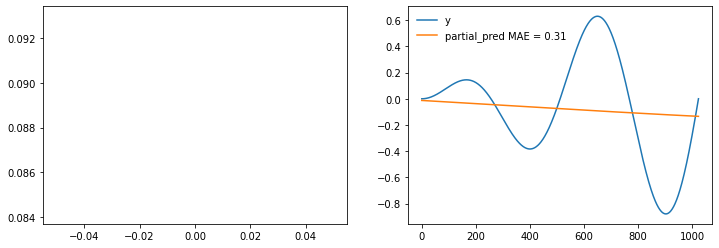

In [27]:
partial_pred = partial.predict(_x)
partial_error = mean_squared_error(y, partial_pred)
partial_error_ = mean_absolute_error(y, partial_pred)
partial_score   = partial.score(_x, y)
partial_error__  = ((y - partial_pred) ** 2).mean() / 2

print('MSE   = ', partial_error)
print('MAE   = ', partial_error_)
print('MSE/2 = ', partial_error/2)
print('SE    = ', partial_error__)
print('loss_ = ', partial.loss_)
print('score = ', partial_score)
print('loss_ = ', partial.loss)
print('t_    = ', partial.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(partial.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()


Fent:

- amit itt látni kell, hogy az `iter = 1` és a `batch_size = 32` mégis a `t_ = 1024` vagyis látta az összes mintát.

Na ez az amit korrigálni kell méghozzá úgy, hogy a for ciklus minden egyes lépésében a batch_size értékével azonos elemszámú mintát veszünk és csak ezt adjuk oda a tanulásnak.


Csakhogy:

Ezzel van egy kis gond.

partial.partial_fit(_x, y) helyett a partial.fit(_x, y) metódust használtam.

Ez pedig nem ugyan az.

In [28]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

partial = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,               # <--
                       learning_rate_init=learning_rate,
                       max_iter=1,                          # <--
                       shuffle=shuffle,
                       random_state=random_state,
                       verbose=verbose,
                       warm_start=True,                     # <--
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=iter)

partial.partial_fit(_x,y)

MLPRegressor(activation='tanh', batch_size=32, hidden_layer_sizes=(20,),
             learning_rate_init=0.02, max_iter=1, n_iter_no_change=1000,
             nesterovs_momentum=False, random_state=3, solver='sgd',
             validation_fraction=0.0, verbose=0, warm_start=True)

MSE   =  0.15037119117297257
MAE   =  0.30698403966043963
MSE/2 =  0.07518559558648628
SE    =  0.07518559558648628
loss_ =  0.08855890038940362
score =  0.05183155078114288
loss_ =  squared_error
t_    =  1024


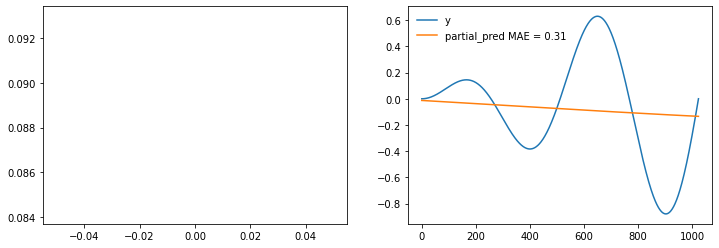

In [29]:
partial_pred = partial.predict(_x)
partial_error = mean_squared_error(y, partial_pred)
partial_error_ = mean_absolute_error(y, partial_pred)
partial_score   = partial.score(_x, y)
partial_error__  = ((y - partial_pred) ** 2).mean() / 2

print('MSE   = ', partial_error)
print('MAE   = ', partial_error_)
print('MSE/2 = ', partial_error/2)
print('SE    = ', partial_error__)
print('loss_ = ', partial.loss_)
print('score = ', partial_score)
print('loss_ = ', partial.loss)
print('t_    = ', partial.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(partial.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()


Fent:

Vagy mégis?

In [31]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

partial = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,               # <--
                       learning_rate_init=learning_rate,
                       max_iter=1,                          # <--
                       shuffle=shuffle,
                       random_state=random_state,
                       verbose=verbose,
                       warm_start=True,                     # <--
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=iter)


n_iter = int(y.size / batch_size)                           # <-- 1024 / 32

# print(n_iter)

for i in range(1, n_iter + 1):                              # <-- 1,33
  # print(i)
  _x_batch = _x[(i-1)*batch_size:i*batch_size]
  y_batch  = y[(i-1)*batch_size:i*batch_size]

  partial.fit(_x_batch, y_batch)                            # <-- fit (!)

MSE   =  0.21729928354467584
MAE   =  0.3953892342226141
MSE/2 =  0.10864964177233792
SE    =  0.10864964177233792
loss_ =  0.005891030518681222
score =  -0.3701848278765021
loss_ =  squared_error
t_    =  1024


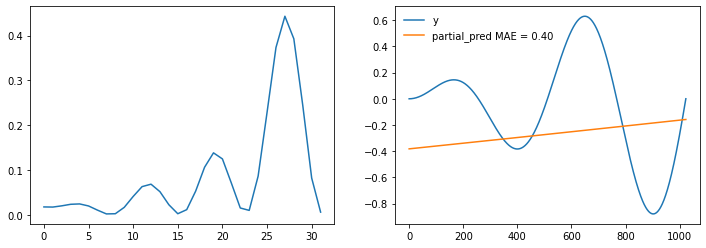

In [32]:
partial_pred = partial.predict(_x)
partial_error = mean_squared_error(y, partial_pred)
partial_error_ = mean_absolute_error(y, partial_pred)
partial_score   = partial.score(_x, y)
partial_error__  = ((y - partial_pred) ** 2).mean() / 2

print('MSE   = ', partial_error)
print('MAE   = ', partial_error_)
print('MSE/2 = ', partial_error/2)
print('SE    = ', partial_error__)
print('loss_ = ', partial.loss_)
print('score = ', partial_score)
print('loss_ = ', partial.loss)
print('t_    = ', partial.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(partial.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()


Fent:

Na ez amit fent láttunk felel meg egy epoch-nak.

Szekvenciálisan végig ment mint az 1024 elemen 32 elemű darabokban és közben módosította a súlyokat.

Most ezt az egészet megismételjük 20 szor.

Csakhogy:

Ez sem a partial_fit segítségével hajtottam végre, hiába (?) a warm_start.

In [39]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

partial = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,               # <--
                       learning_rate_init=learning_rate,
                       max_iter=1,                          # <--
                       shuffle=shuffle,
                       random_state=random_state,
                       verbose=verbose,
                       warm_start=True,                     # <--
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=iter)


n_iter = int(y.size / batch_size)                           # <-- 1024 / 32

# print(n_iter)

for i in range(1, n_iter + 1):                              # <-- 1,33
  # print(i)
  _x_batch = _x[(i-1)*batch_size:i*batch_size]
  y_batch  = y[(i-1)*batch_size:i*batch_size]

  partial.partial_fit(_x_batch, y_batch)                    # <-- javítva (!)

MSE   =  0.8417421964696116
MAE   =  0.8318926297093805
MSE/2 =  0.4208710982348058
SE    =  0.4208710982348058
loss_ =  0.1553499591174629
score =  -4.307621671697694
loss_ =  squared_error
t_    =  1024


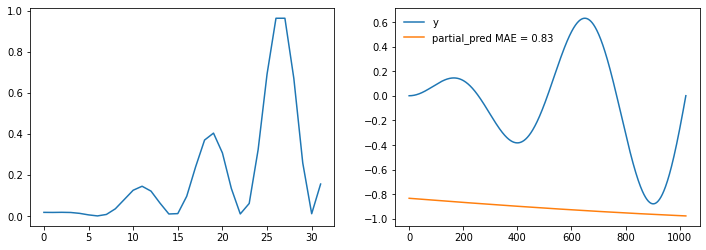

In [40]:
partial_pred = partial.predict(_x)
partial_error = mean_squared_error(y, partial_pred)
partial_error_ = mean_absolute_error(y, partial_pred)
partial_score   = partial.score(_x, y)
partial_error__  = ((y - partial_pred) ** 2).mean() / 2

print('MSE   = ', partial_error)
print('MAE   = ', partial_error_)
print('MSE/2 = ', partial_error/2)
print('SE    = ', partial_error__)
print('loss_ = ', partial.loss_)
print('score = ', partial_score)
print('loss_ = ', partial.loss)
print('t_    = ', partial.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(partial.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()


Fent:

Merőben más az eredmény. És itt most álljunk meg és méllázzunk el ezen a dolgon.

Fejlemény:

A megoldás közben [mint később látni fogjuk] megszületett, de most leírom ide is.

Pontosan még nem értem, de a különbséget a learning_rate változtatásával lehet majd korrigálni.

Minden másban ugyanis a két megoldás azonos, abban a tekintetben, hogy ugyan annyiszor és ugyan azokra az adatokra néztek rá, mégis a súlyok módosítása másképpen történik és ennek eredményeképpen a becslés végeredménye is másképpen alakul.

1. végezzünk egy összehasonlítást
2. vizsgáljuk meg milyen eredményt adna a partial_fit ha a learning_rate 1.0 lenne.



Oké

Akkor most jöhet az igazi teszt.

In [204]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

partial = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,               # <--
                       learning_rate_init=learning_rate,
                       max_iter=1,                          # <--
                       shuffle=shuffle,
                       random_state=random_state,
                       verbose=verbose,
                       warm_start=True,                     # <--
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=iter)


n_iter = int(y.size / batch_size)                           # <-- 1024 / 32

# print(n_iter)

for j in range(iter):
  # print(j)
  for i in range(1, n_iter + 1):
    # print(i)
    _x_batch = _x[(i-1)*batch_size:i*batch_size]
    y_batch  = y[(i-1)*batch_size:i*batch_size]

    partial.fit(_x_batch, y_batch)

MSE   =  0.14294784421640225
MAE   =  0.2897884367930327
MSE/2 =  0.07147392210820112
SE    =  0.07147392210820112
loss_ =  0.028002187695828837
score =  0.09863960834137253
loss_ =  squared_error
t_    =  20480


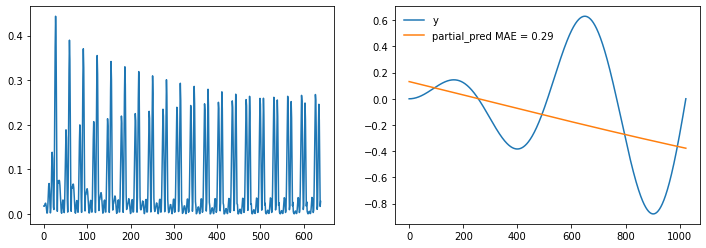

In [205]:
partial_pred = partial.predict(_x)
partial_error = mean_squared_error(y, partial_pred)
partial_error_ = mean_absolute_error(y, partial_pred)
partial_score   = partial.score(_x, y)
partial_error__  = ((y - partial_pred) ** 2).mean() / 2

print('MSE   = ', partial_error)
print('MAE   = ', partial_error_)
print('MSE/2 = ', partial_error/2)
print('SE    = ', partial_error__)
print('loss_ = ', partial.loss_)
print('score = ', partial_score)
print('loss_ = ', partial.loss)
print('t_    = ', partial.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(partial.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()


Fent:

Rendben ez a nem jó megoldás vagy azért mert túl magas a learning rate, vagy mert egyszerűen rossz.

Egyenlőre nem értem az oszcilláció okát.

De nézzük meg milyen lenne partial_fit() segítségével.

In [206]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

partial = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,               # <--
                       learning_rate_init=learning_rate,
                       max_iter=1,                          # <--
                       shuffle=shuffle,
                       random_state=random_state,
                       verbose=verbose,
                       warm_start=True,                     # <--
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=iter)


n_iter = int(y.size / batch_size)                           # <-- 1024 / 32

# print(n_iter)

for j in range(iter):
  # print(j)
  for i in range(1, n_iter + 1):
    # print(i)
    _x_batch = _x[(i-1)*batch_size:i*batch_size]
    y_batch  = y[(i-1)*batch_size:i*batch_size]

    partial.partial_fit(_x_batch, y_batch)

MSE   =  0.17668393801714866
MAE   =  0.3719044691835386
MSE/2 =  0.08834196900857433
SE    =  0.08834196900857433
loss_ =  0.009155285467391645
score =  -0.11408398247570273
loss_ =  squared_error
t_    =  20480


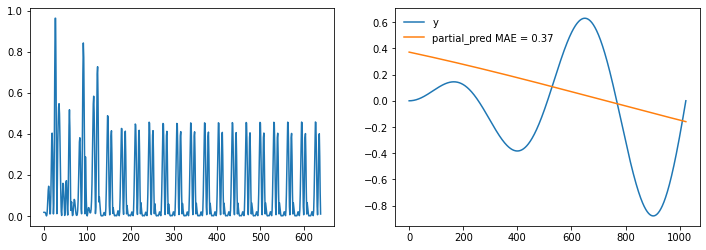

In [207]:
partial_pred = partial.predict(_x)
partial_error = mean_squared_error(y, partial_pred)
partial_error_ = mean_absolute_error(y, partial_pred)
partial_score   = partial.score(_x, y)
partial_error__  = ((y - partial_pred) ** 2).mean() / 2

print('MSE   = ', partial_error)
print('MAE   = ', partial_error_)
print('MSE/2 = ', partial_error/2)
print('SE    = ', partial_error__)
print('loss_ = ', partial.loss_)
print('score = ', partial_score)
print('loss_ = ', partial.loss)
print('t_    = ', partial.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(partial.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()


Oké

Van egy feltételezésem, hogy miért oszcillál mint az állat.

Mivel szekvenciálisan megyünk végig az adatokon és az adatokban van egy hatalmas autokorrelációs egyettható, ezért x->y relációt nem képes megragadni.

Viszont ha a batcheket úgy állítanám elő, hogy elötte a teljes mintát az adatpárok sorrendjét megtartva összekeverem akkor jobb eredményt kapnék.

Tehát minden marad a régiben, csak elötte az adatokat amiből a batchek előállnak összekeverem.

Shuffle

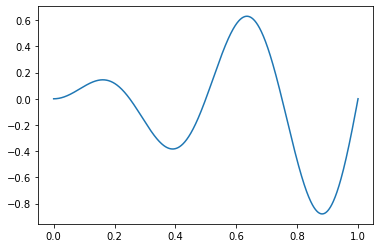

In [236]:
_xy = np.dstack((_x.ravel(), y)).reshape(y.size, 2)
_xy.shape

plt.plot(_xy[:,0], _xy[:,1])
plt.show()

_xy_shuffled = _xy.copy()
np.random.shuffle(_xy_shuffled)

_x_shuffled = _xy_shuffled[:,0].copy()
_x_shuffled = _x_shuffled.reshape(y.size, 1)

y_shuffled  = _xy_shuffled[:,1].copy()


0
--------------------------------------------





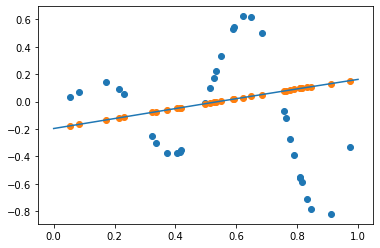

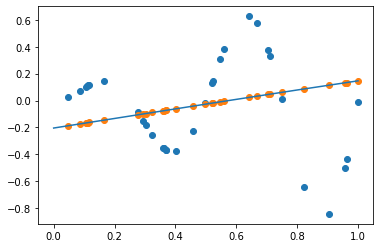

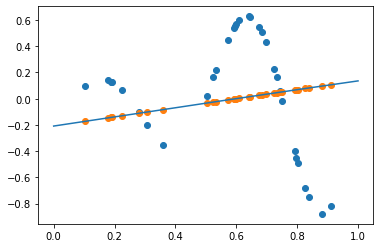

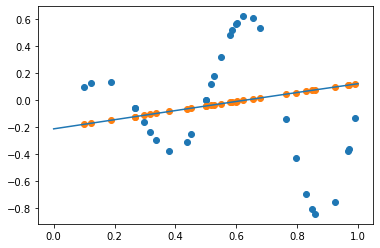

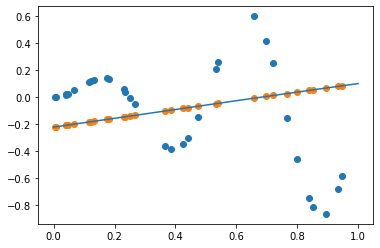

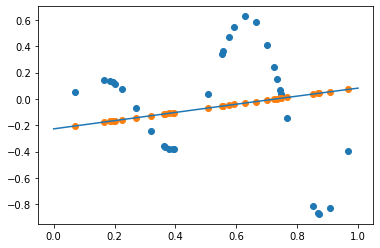

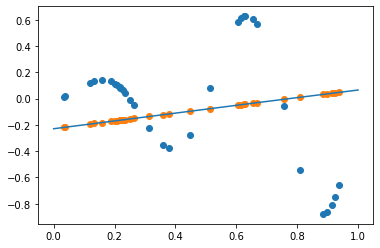

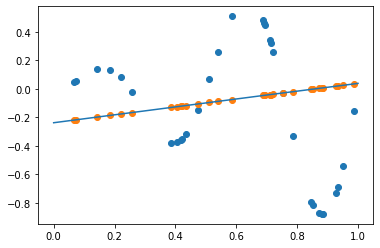

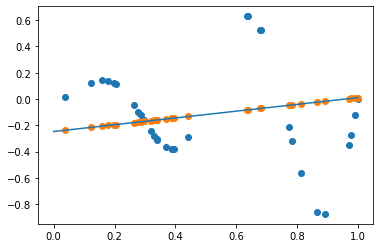

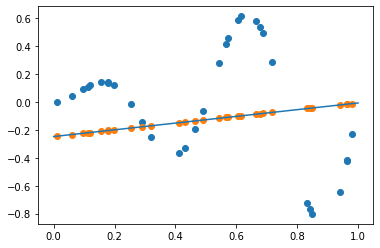

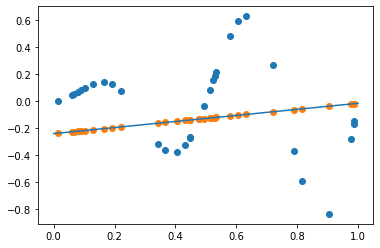

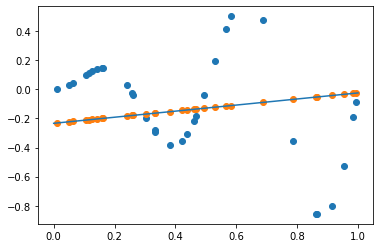

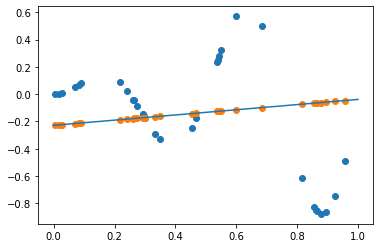

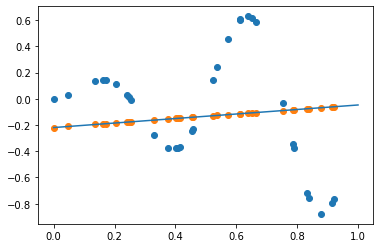

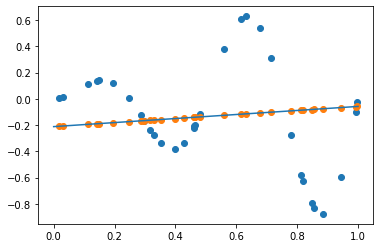

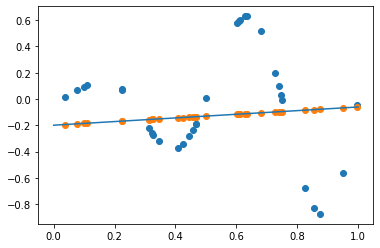

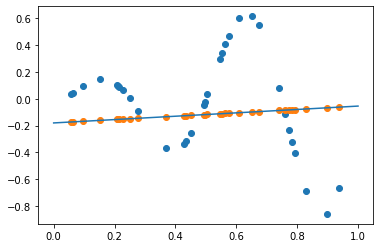

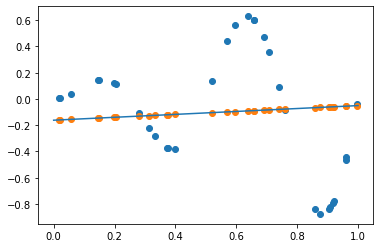

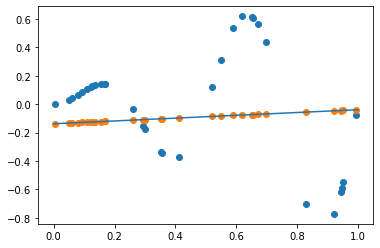

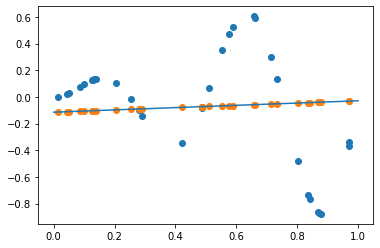

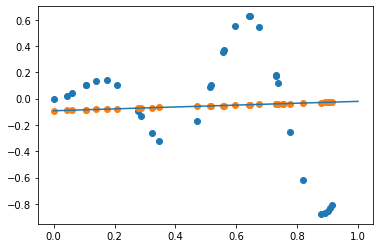

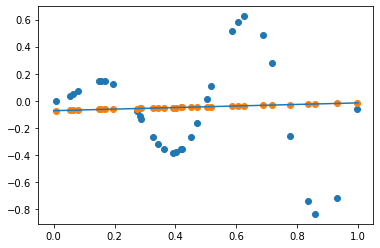

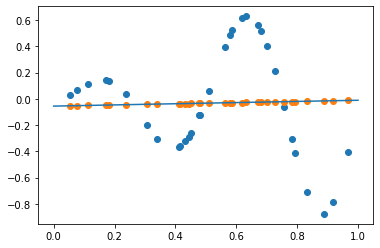

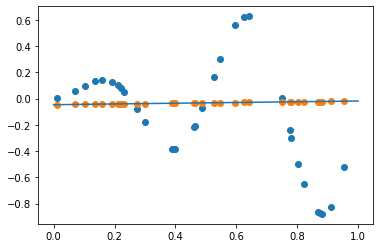

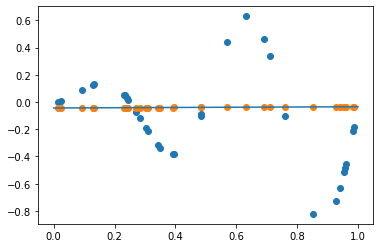

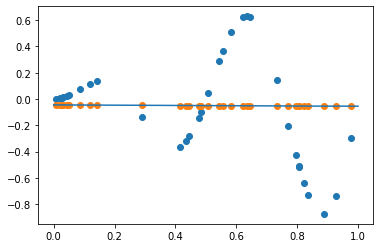

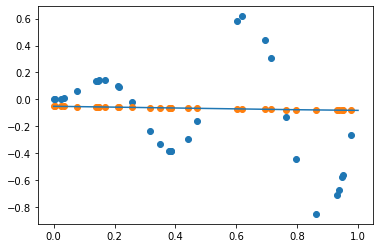

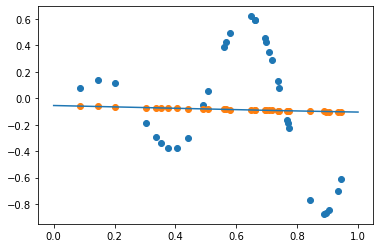

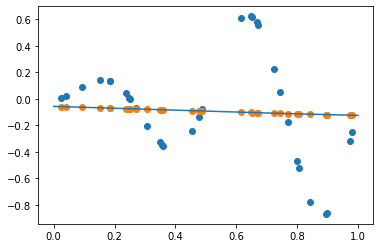

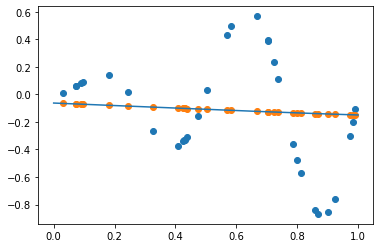

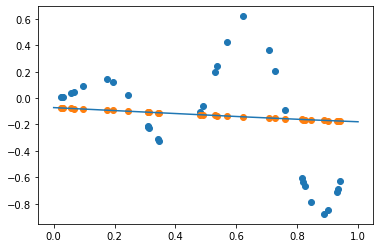

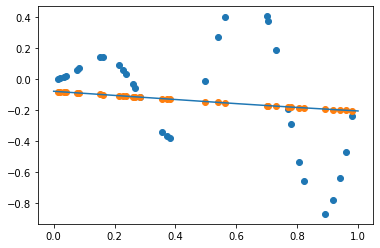

1
--------------------------------------------





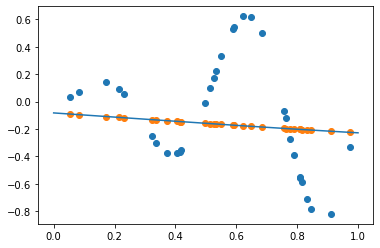

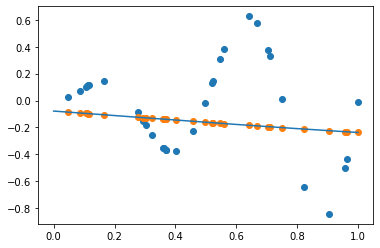

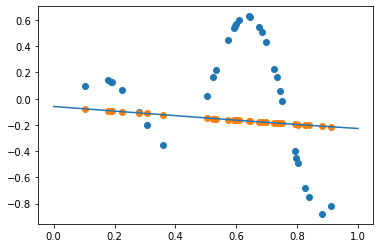

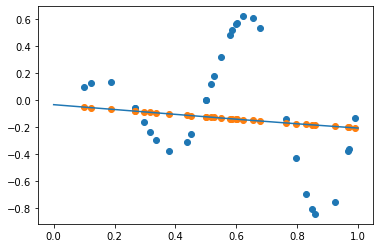

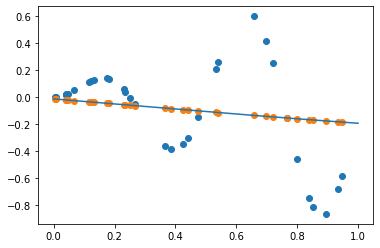

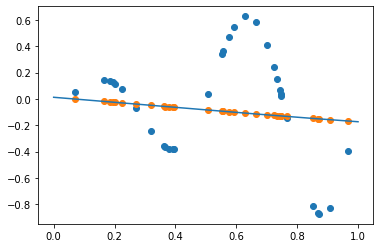

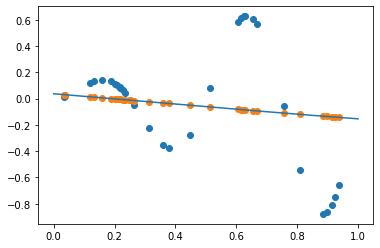

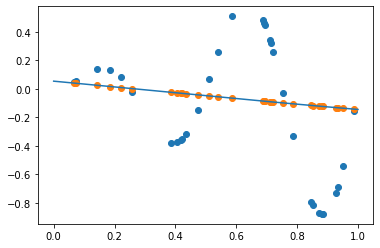

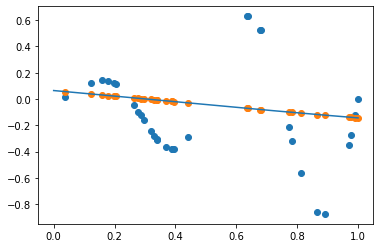

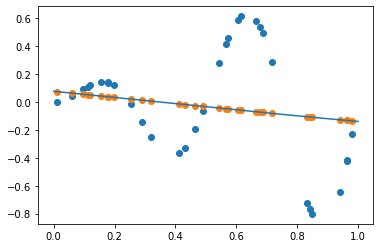

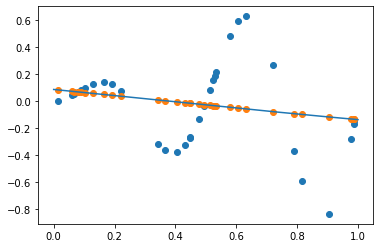

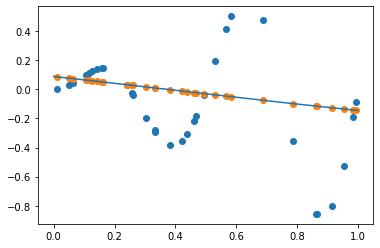

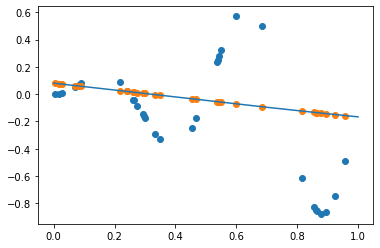

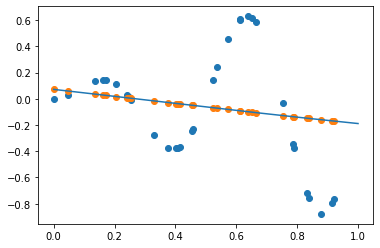

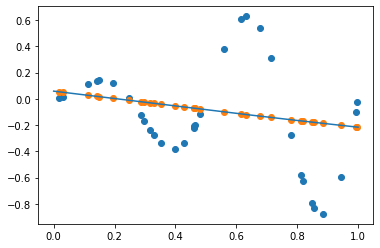

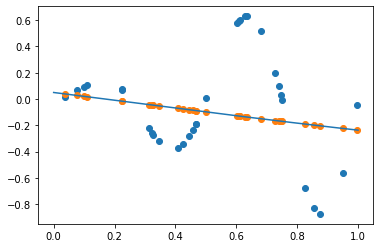

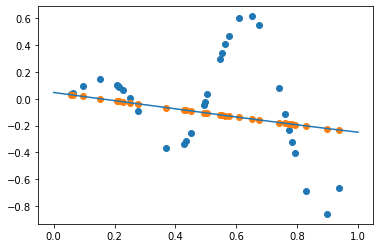

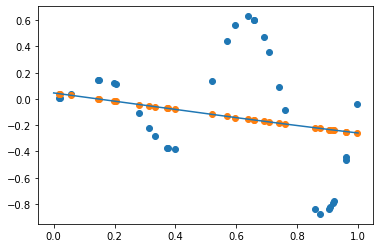

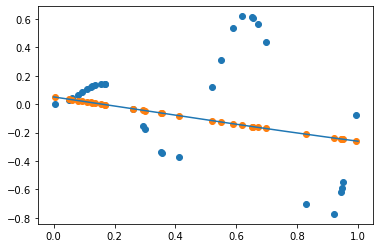

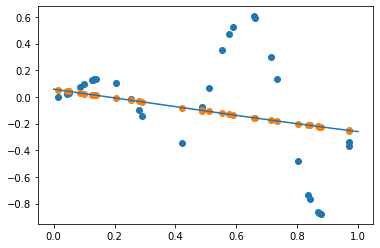

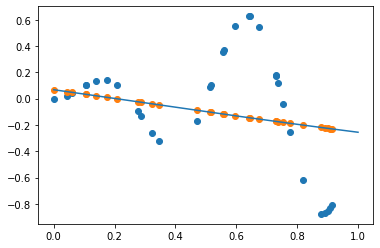

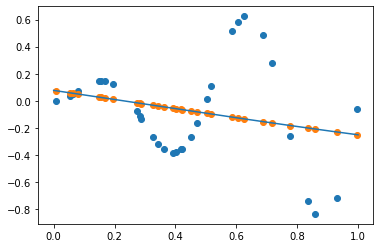

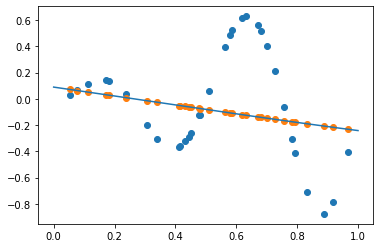

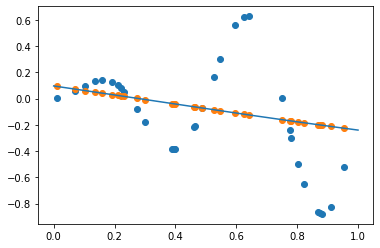

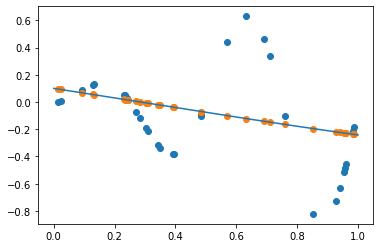

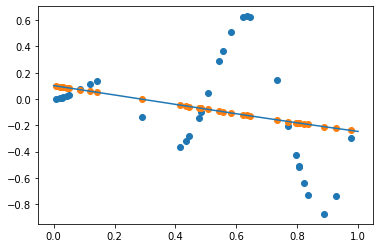

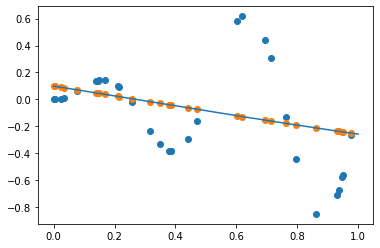

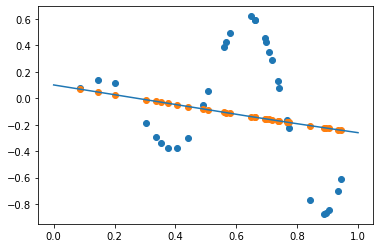

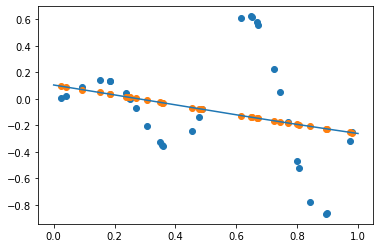

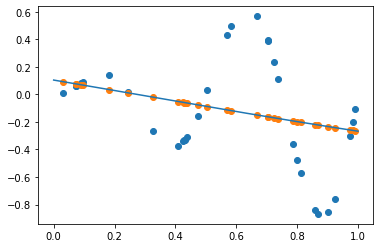

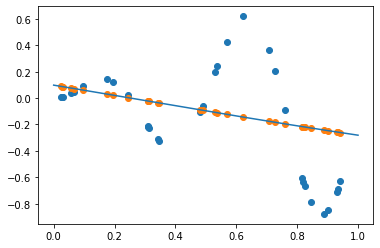

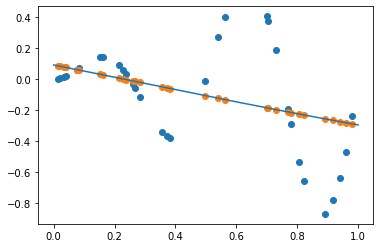

In [249]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

partial = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,               # <--
                       learning_rate_init=learning_rate,
                       max_iter=1,                          # <--
                       shuffle=shuffle,
                       random_state=random_state,
                       verbose=verbose,
                       warm_start=True,                     # <--
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=iter)


n_iter = int(y.size / batch_size)                           # <-- 1024 / 32

# print(n_iter)

# iter
for j in range(2):
  print(j)
  print('--------------------------------------------\n\n\n')
  for i in range(1, n_iter + 1):
    # print(i)
    _x_batch = _x_shuffled[(i-1)*batch_size:i*batch_size]
    y_batch  = y_shuffled[(i-1)*batch_size:i*batch_size]

    partial.partial_fit(_x_batch, y_batch)

    y_pred_batch = partial.predict(_x_batch)
    y_pred_all = partial.predict(_x)

    plt.scatter(_x_batch.ravel(), y_batch)
    plt.scatter(_x_batch.ravel(), y_pred_batch)
    plt.plot(_x.ravel(), y_pred_all)
    plt.show()

MSE   =  0.14163341331216017
MAE   =  0.2912276041169049
MSE/2 =  0.07081670665608009
SE    =  0.07081670665608009
loss_ =  0.042932881058075655
score =  0.10692777778632245
loss_ =  squared_error
t_    =  2048


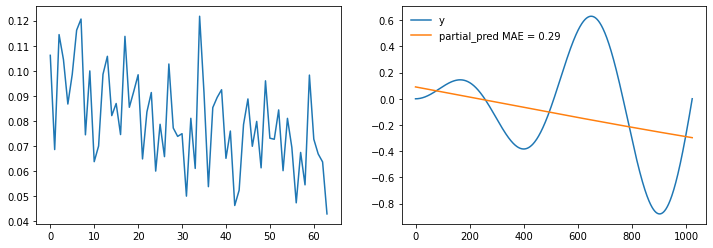

In [250]:
partial_pred = partial.predict(_x)
partial_error = mean_squared_error(y, partial_pred)
partial_error_ = mean_absolute_error(y, partial_pred)
partial_score   = partial.score(_x, y)
partial_error__  = ((y - partial_pred) ** 2).mean() / 2

print('MSE   = ', partial_error)
print('MAE   = ', partial_error_)
print('MSE/2 = ', partial_error/2)
print('SE    = ', partial_error__)
print('loss_ = ', partial.loss_)
print('score = ', partial_score)
print('loss_ = ', partial.loss)
print('t_    = ', partial.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(partial.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()


(?)

Az lenne a baj, hogy újra és újra ugyan azokon a mintákon tanul vagyis ugyan azokon a minta csoportokon?

lehet, hogy minden iteráció után újra kéne mintavételeznem?

0
--------------------------------------------



_x_shuffled[0,:] =  [0.8113392]
y_shuffled[0]   =  -0.5654138437634276
--------------------------------------------





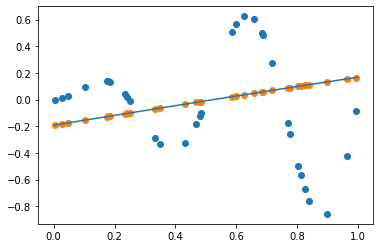

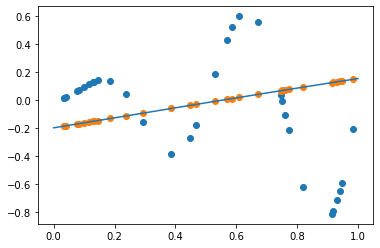

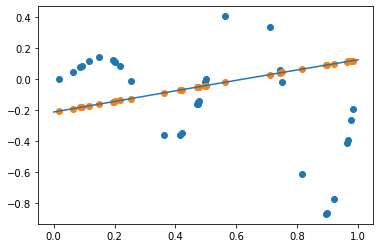

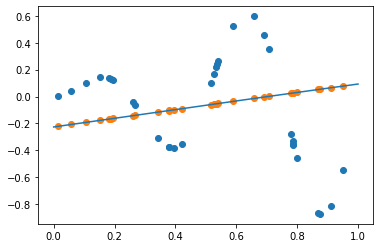

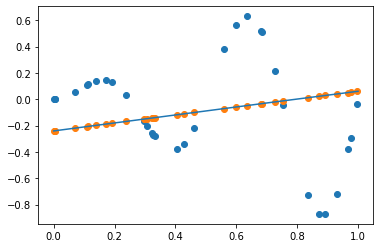

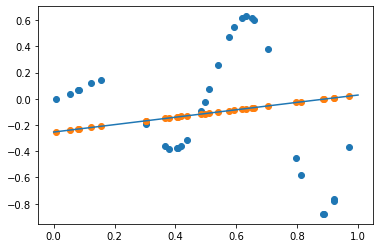

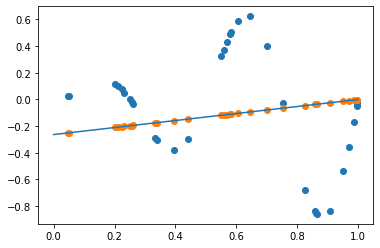

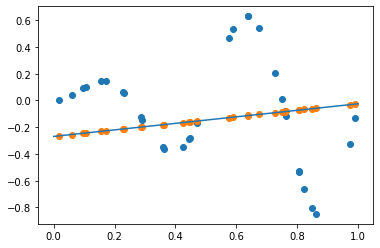

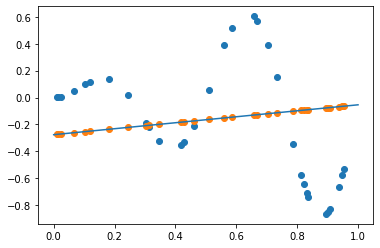

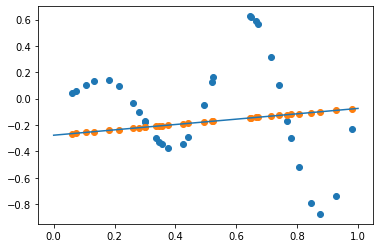

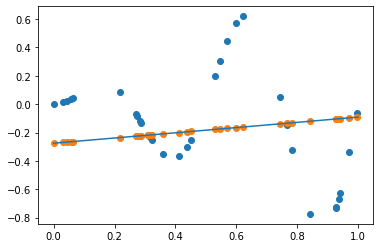

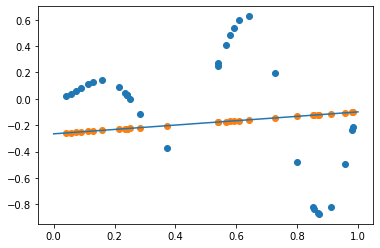

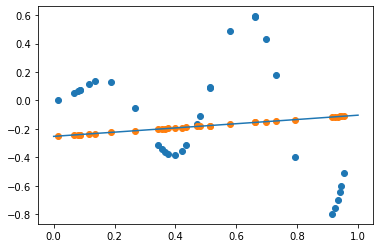

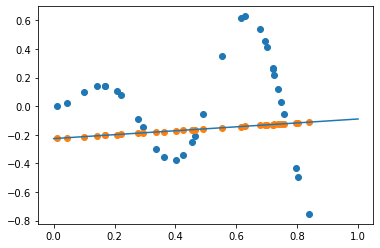

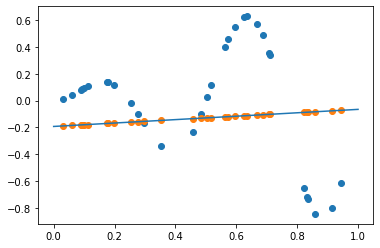

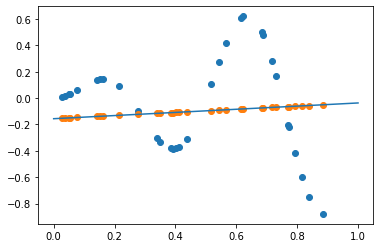

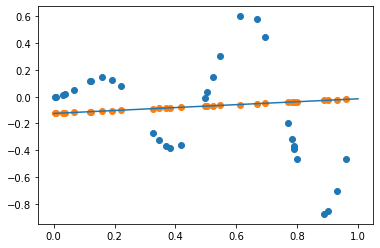

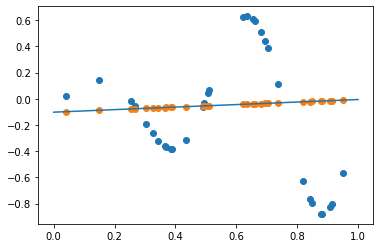

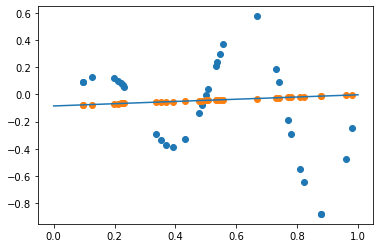

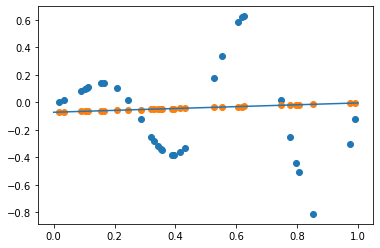

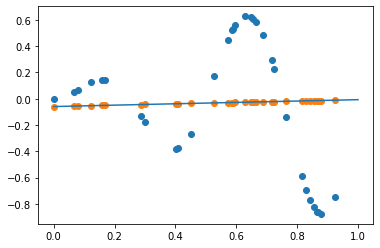

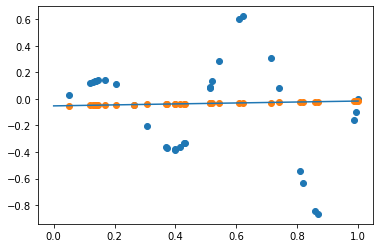

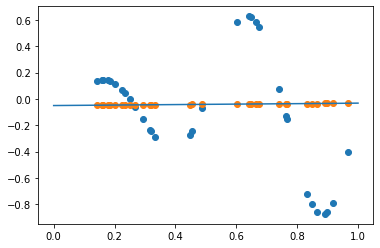

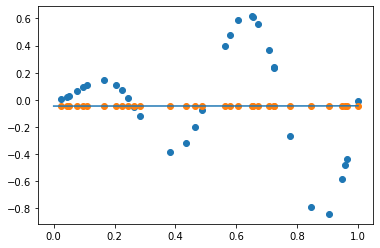

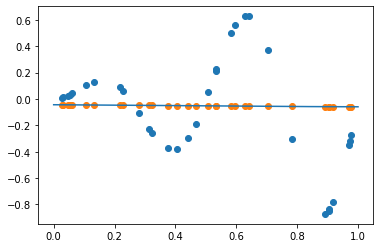

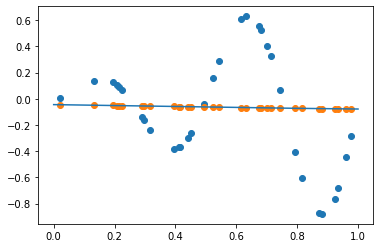

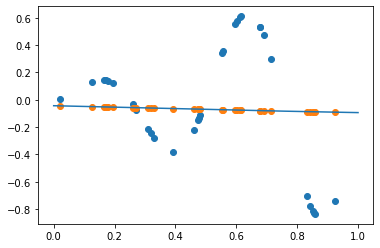

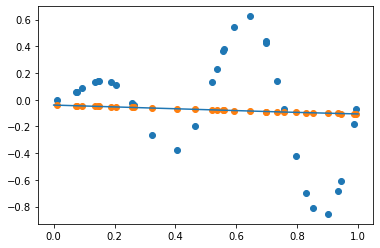

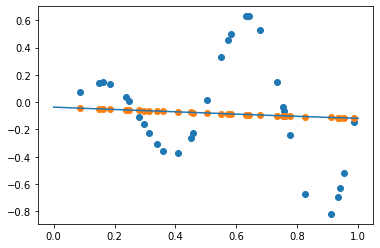

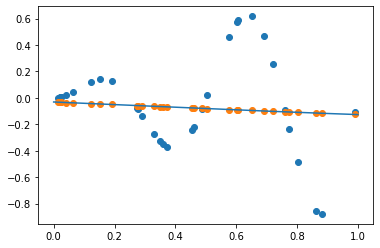

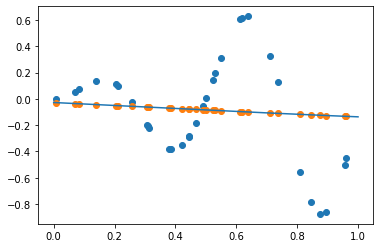

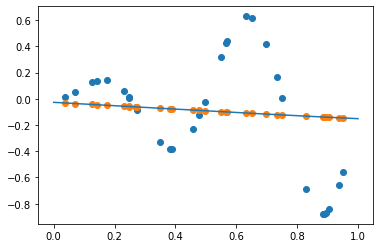

1
--------------------------------------------



_x_shuffled[0,:] =  [0.76246334]
y_shuffled[0]   =  -0.11909863297857395
--------------------------------------------





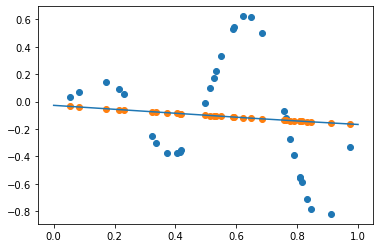

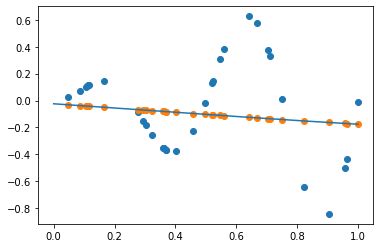

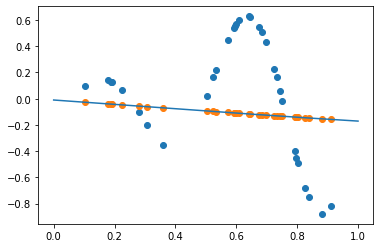

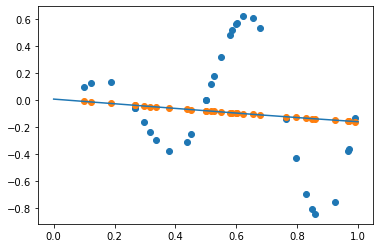

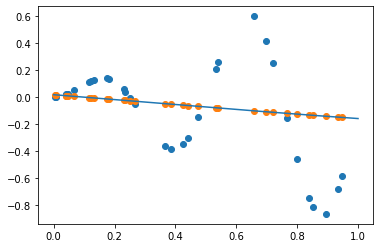

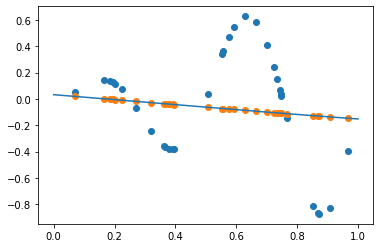

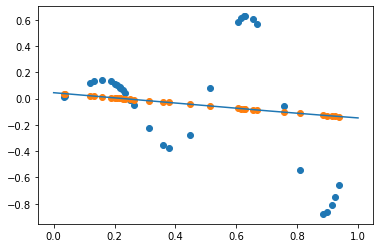

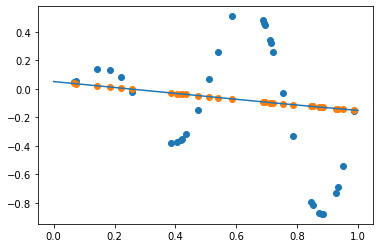

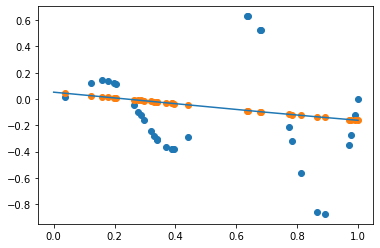

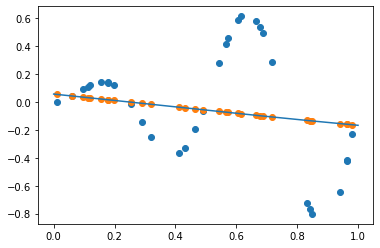

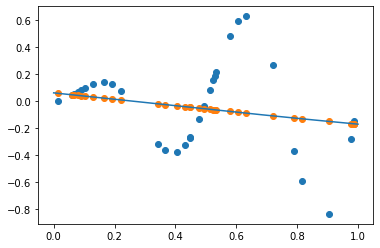

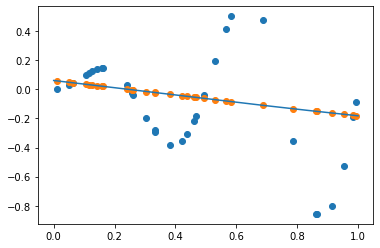

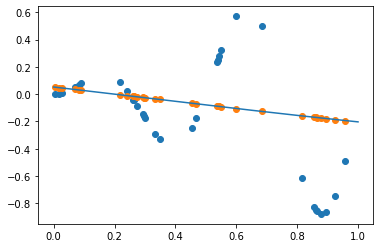

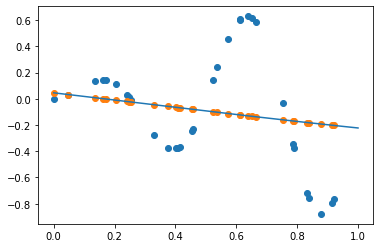

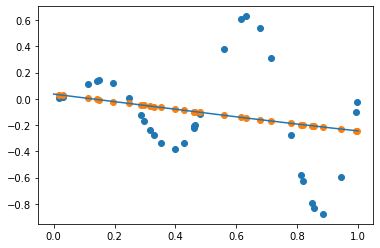

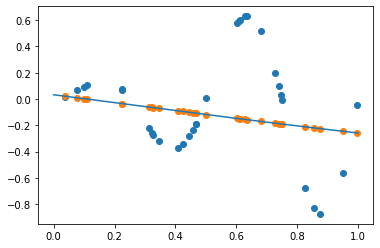

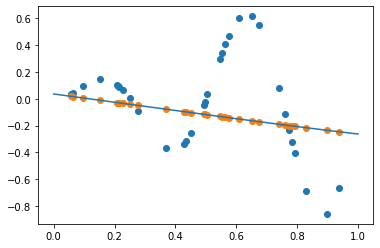

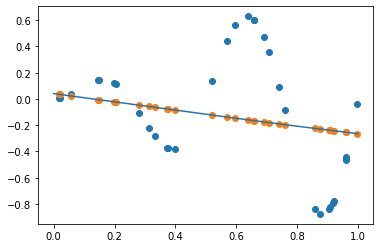

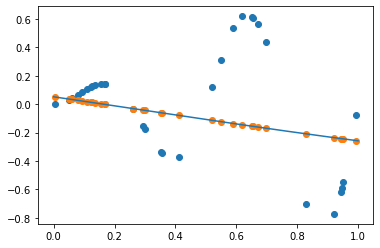

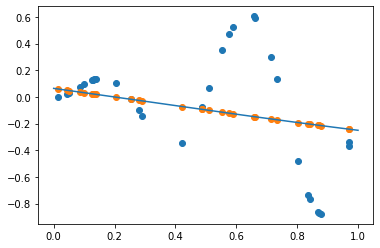

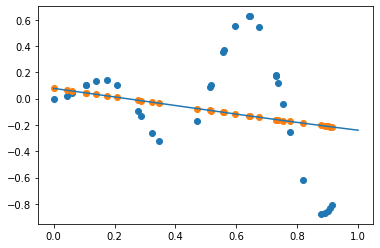

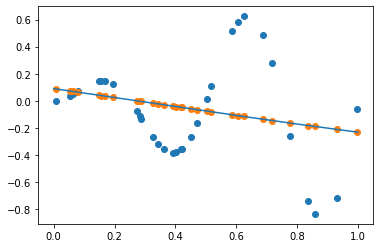

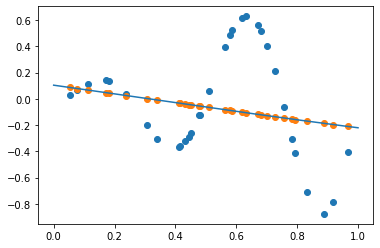

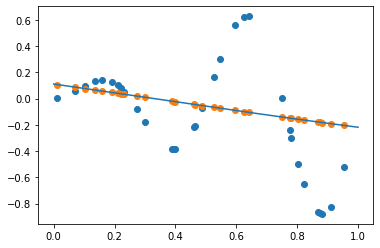

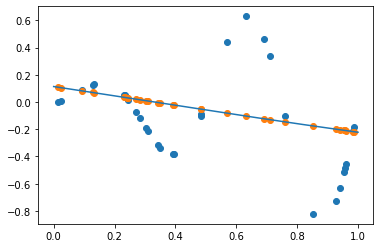

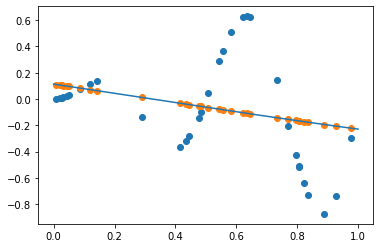

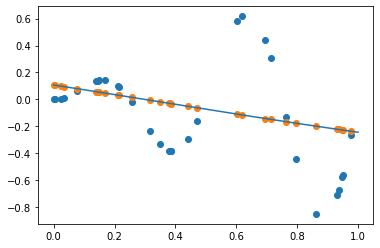

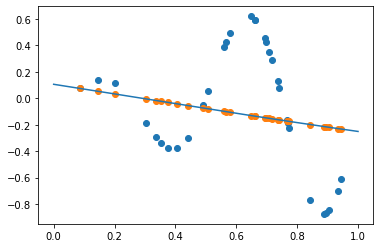

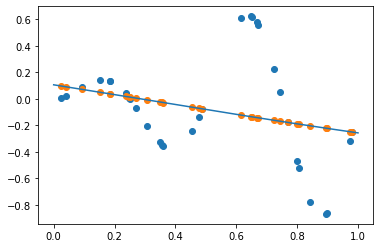

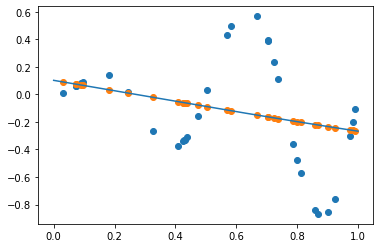

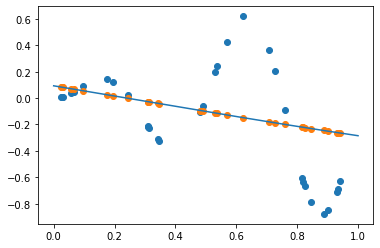

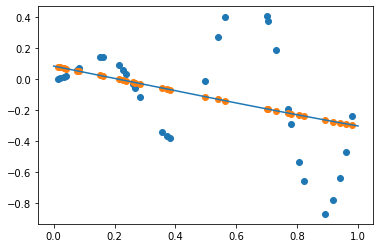

In [247]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

partial = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,               # <--
                       learning_rate_init=learning_rate,
                       max_iter=1,                          # <--
                       shuffle=shuffle,
                       random_state=random_state,
                       verbose=verbose,
                       warm_start=True,                     # <--
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=iter)


n_iter = int(y.size / batch_size)                           # <-- 1024 / 32

# print(n_iter)


# iter
for j in range(2):
  print(j)
  print('--------------------------------------------\n\n\n')
  # shuffle
  _xy = np.dstack((_x.ravel(), y)).reshape(y.size, 2)

  _xy_shuffled = _xy.copy()
  np.random.shuffle(_xy_shuffled)

  _x_shuffled = _xy_shuffled[:,0].copy()
  _x_shuffled = _x_shuffled.reshape(y.size, 1)
  y_shuffled  = _xy_shuffled[:,1].copy()

  print('_x_shuffled[0,:] = ', _x_shuffled[0, :])
  print('y_shuffled[0]   = ', y_shuffled[0])
  print('--------------------------------------------\n\n\n')


  for i in range(1, n_iter + 1):
    # print(i)
    _x_batch = _x_shuffled[(i-1)*batch_size:i*batch_size]
    y_batch  = y_shuffled[(i-1)*batch_size:i*batch_size]

    partial.partial_fit(_x_batch, y_batch)

    y_pred_batch = partial.predict(_x_batch)
    y_pred_all = partial.predict(_x)

    plt.scatter(_x_batch.ravel(), y_batch)
    plt.scatter(_x_batch.ravel(), y_pred_batch)
    plt.plot(_x.ravel(), y_pred_all)
    plt.show()

MSE   =  0.14209993975923377
MAE   =  0.29117933098556376
MSE/2 =  0.07104996987961688
SE    =  0.07104996987961688
loss_ =  0.04279740452148905
score =  0.10398608626688421
loss_ =  squared_error
t_    =  2048


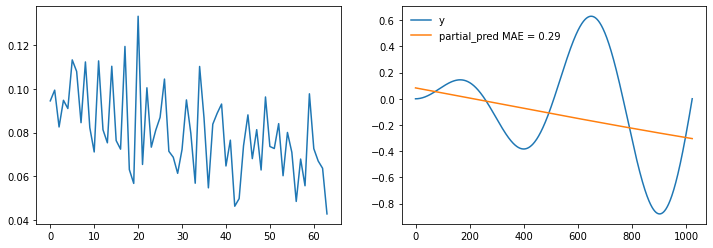

In [248]:
partial_pred = partial.predict(_x)
partial_error = mean_squared_error(y, partial_pred)
partial_error_ = mean_absolute_error(y, partial_pred)
partial_score   = partial.score(_x, y)
partial_error__  = ((y - partial_pred) ** 2).mean() / 2

print('MSE   = ', partial_error)
print('MAE   = ', partial_error_)
print('MSE/2 = ', partial_error/2)
print('SE    = ', partial_error__)
print('loss_ = ', partial.loss_)
print('score = ', partial_score)
print('loss_ = ', partial.loss)
print('t_    = ', partial.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(partial.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()


Fent:

Hát nem ez volt a hiba.

Ugyan azt az eredményt kapom, ha iterációnként újra mintavétlezek.

Ami azért furcsa.

In [297]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

partial = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,               # <--
                       learning_rate_init=0.5,
                       max_iter=1,                          # <--
                       shuffle=False,
                       random_state=random_state,
                       verbose=0,
                       warm_start=True,                     # <--
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=99999999)


n_iter = int(y.size / batch_size)                           # <-- 1024 / 32

# print(n_iter)

partial_epoch_loss = []


# iter
for j in range(100):
#  print(j)
#  print('--------------------------------------------\n\n\n')
  # shuffle
  _xy = np.dstack((_x.ravel(), y)).reshape(y.size, 2)

  _xy_shuffled = _xy.copy()
  np.random.shuffle(_xy_shuffled)

  _x_shuffled = _xy_shuffled[:,0].copy()
  _x_shuffled = _x_shuffled.reshape(y.size, 1)
  y_shuffled  = _xy_shuffled[:,1].copy()

#  print('_x_shuffled[0,:] = ', _x_shuffled[0, :])
#  print('y_shuffled[0]   = ', y_shuffled[0])
#  print('--------------------------------------------\n\n\n')


  for i in range(1, n_iter + 1):
    # print(i)
    _x_batch = _x_shuffled[(i-1)*batch_size:i*batch_size]
    y_batch  = y_shuffled[(i-1)*batch_size:i*batch_size]

    partial.partial_fit(_x_batch, y_batch)

#    y_pred_batch = partial.predict(_x_batch)
#    y_pred_all = partial.predict(_x)

#    plt.scatter(_x_batch.ravel(), y_batch)
#    plt.scatter(_x_batch.ravel(), y_pred_batch)
#    plt.plot(_x.ravel(), y_pred_all)
#    plt.show()

  # hibba mérése az iteráció végén
  # (1) Hiba az összes adatra
  y_pred_all = partial.predict(_x)
  partial_iter_error__  = ((y - y_pred_all) ** 2).mean() / 2
  partial_epoch_loss.append(partial_iter_error__)

MSE   =  0.01482427368121641
MAE   =  0.08224420222887349
MSE/2 =  0.007412136840608205
SE    =  0.007412136840608205
loss_ =  0.007365661012942562
score =  0.9065252560848154
loss_ =  squared_error
t_    =  102400


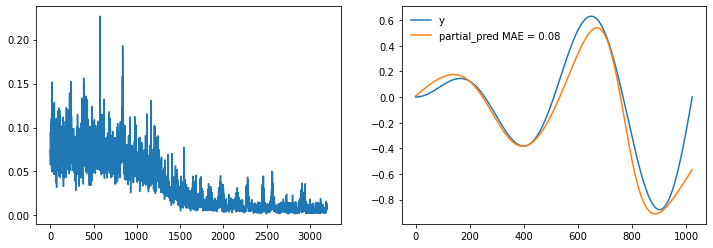

In [298]:
partial_pred = partial.predict(_x)
partial_error = mean_squared_error(y, partial_pred)
partial_error_ = mean_absolute_error(y, partial_pred)
partial_score   = partial.score(_x, y)
partial_error__  = ((y - partial_pred) ** 2).mean() / 2

print('MSE   = ', partial_error)
print('MAE   = ', partial_error_)
print('MSE/2 = ', partial_error/2)
print('SE    = ', partial_error__)
print('loss_ = ', partial.loss_)
print('score = ', partial_score)
print('loss_ = ', partial.loss)
print('t_    = ', partial.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(partial.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()


Fent:

A következő dolgok látszanak:

- a loss-ban a 'zaj' a 'zizegés' azért van mert mindíg más mintát kap és ezen akár a korábbihoz képest is nagyobb hibát érhet el.

- a learning_rate iszonyú hatással van a tanulásra. <br>
  A pontos működést még nem értem, de gyakorlatilag ezt az értéket 0.001 helyett 0.2-re állítva sokkal jobb, 0.5-re állítva még jobb eredményt kaptam. Ezek alatt nem konvergált a loss.

- mivel az iter = 1 ezért a learning rate ebben az esetben lehetne 1 is.

## Megjegyzés

Holnap megcsinálhatnám azt is, hogy minden iteráció végén egy listához adom a square_error-t és azt is megjelenítem.

Az lenne az ami megfelelne az epoch/batch_size alapú loss-nak. Ott ugyanis minden batch végén modoítja a súlyokat, de a loss-t csak az epoch végén írja ki.

Igy ha 1024 mintában 32 elemű batcheket választ akkor 32 iterációból áll egy epoch, tehát ennyiszer módosítja a súlyokat mielött kiszámolna az epochra mért hibát - ezért van az, hogy azok a loss_ görbék sokkal simábbak. Ha így számolnám itt is az lenne.

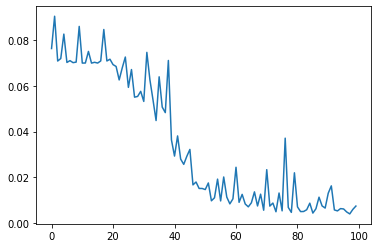

In [299]:
plt.plot(partial_epoch_loss)

Hát ez így ebben a formában nem igaz.

Viszont 10x kevesebbszer nézett rá az adatokra mint a kiinduló állapotban.

In [308]:
learning_rate

0.02

In [313]:
np.random.seed(np_random_seed)
np.random.default_rng(np_random_seed)

default = MLPRegressor(hidden_layer_sizes=architect,
                       activation=activation,
                       solver=solver,
                       batch_size=batch_size,
                       learning_rate_init=0.5,
                       max_iter=100,
                       shuffle=shuffle,
                       random_state=random_state,
                       verbose=verbose,
                       warm_start=False,
                       nesterovs_momentum=False,
                       validation_fraction=0.0,
                       n_iter_no_change=1000)

default.fit(_x,y)


MLPRegressor(activation='tanh', batch_size=32, hidden_layer_sizes=(20,),
             learning_rate_init=0.5, max_iter=100, n_iter_no_change=1000,
             nesterovs_momentum=False, random_state=3, solver='sgd',
             validation_fraction=0.0, verbose=0)

MSE   =  0.011023646654798257
MAE   =  0.06844309761819026
MSE/2 =  0.0055118233273991285
SE    =  0.0055118233273991285
loss_ =  0.011060075576916273
score =  0.9304901831801451
loss_ =  squared_error
t_    =  102400


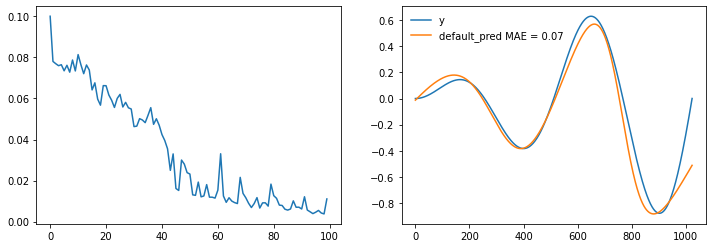

In [314]:
default_pred = default.predict(_x)
default_error = mean_squared_error(y, default_pred)
default_error_ = mean_absolute_error(y, default_pred)
default_score   = default.score(_x, y)
default_error__  = ((y - default_pred) ** 2).mean() / 2

print('MSE   = ', default_error)
print('MAE   = ', default_error_)
print('MSE/2 = ', default_error/2)
print('SE    = ', default_error__)
print('loss_ = ', default.loss_)
print('score = ', default_score)
print('loss_ = ', default.loss)
print('t_    = ', default.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(default.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(default_pred, label = 'default_pred ' + str('MAE = {:.2f}'.format(default_error_)))
ax2.legend(frameon = False)
plt.show()


# Fontos

A max_iter önmagában kevés.

Az n_iter_no_change értéket ki kell lönőm a csillagokig, hogy ne áljon meg korábban mint a tanítás.


# Jó lesz

Úgy látszik megérte a fáradozást.

Gyakorlatilag a két eredmény nagyon hasonló eredményre vezet.

# Fontos

Meg kell majd próbálni egy hosszabb futást is a másikkal, ahol a learning rate alacsony de megkapja a nyamvas 1000 iterációt. (és ki kell plottolnom az epoch-ra számolt hibát majd azt ö9sszevetnem az eredeti első futással ahol az epoch = 1000 és a leraning_rate = 0.02)

----------------------------------------------
Default
MSE   =  0.011023646654798257
MAE   =  0.06844309761819026
MSE/2 =  0.0055118233273991285
SE    =  0.0055118233273991285
loss_ =  0.011060075576916273
score =  0.9304901831801451
t_    =  102400
----------------------------------------------
Partial
MSE   =  0.01482427368121641
MAE   =  0.08224420222887349
MSE/2 =  0.007412136840608205
SE    =  0.007412136840608205
loss_ =  0.007365661012942562
score =  0.9065252560848154
loss_ =  squared_error
t_    =  102400


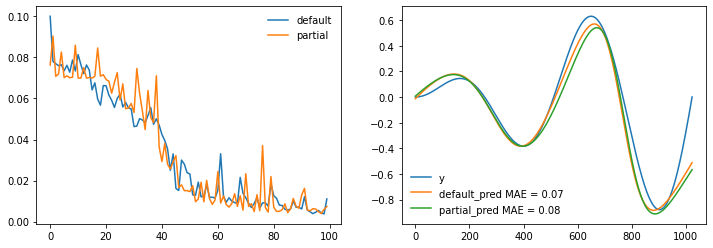

In [317]:
default_pred = default.predict(_x)
default_error = mean_squared_error(y, default_pred)
default_error_ = mean_absolute_error(y, default_pred)
default_score   = default.score(_x, y)
default_error__  = ((y - default_pred) ** 2).mean() / 2

partial_pred = partial.predict(_x)
partial_error = mean_squared_error(y, partial_pred)
partial_error_ = mean_absolute_error(y, partial_pred)
partial_score   = partial.score(_x, y)
partial_error__  = ((y - partial_pred) ** 2).mean() / 2

print('----------------------------------------------')
print('Default')
print('MSE   = ', default_error)
print('MAE   = ', default_error_)
print('MSE/2 = ', default_error/2)
print('SE    = ', default_error__)
print('loss_ = ', default.loss_)
print('score = ', default_score)
print('t_    = ', default.t_)

print('----------------------------------------------')
print('Partial')
print('MSE   = ', partial_error)
print('MAE   = ', partial_error_)
print('MSE/2 = ', partial_error/2)
print('SE    = ', partial_error__)
print('loss_ = ', partial.loss_)
print('score = ', partial_score)
print('loss_ = ', partial.loss)
print('t_    = ', partial.t_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(default.loss_curve_, label = 'default')
ax1.plot(partial_epoch_loss, label = 'partial')
ax1.legend(frameon = False)
ax2.plot(y, label = 'y')
ax2.plot(default_pred, label = 'default_pred ' + str('MAE = {:.2f}'.format(default_error_)))
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()


In [ ]:




fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.plot(partial.loss_curve_)
ax2.plot(y, label = 'y')
ax2.plot(partial_pred, label = 'partial_pred ' + str('MAE = {:.2f}'.format(partial_error_)))
ax2.legend(frameon = False)
plt.show()
